<a href="https://colab.research.google.com/github/maitysuvo19/Placement-Analysis/blob/main/will_you_be_hired.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If some plotly visualizations are not displayed,reloding the page might fix it. 

**Let's go**

# PROBLEM DEFINITION

The data set contains students acadenic records as well as placement and salary information of the 215 students of a business school in India.

Let's take a look at the different variables of the data set.

1.   sl_no : Serial Number
2.   gender: Gender- Male='M',Female='F'

1.  ssc_p : Secondary Education percentage- 10th Grade 
2.  ssc_b : Board of Education- Central/ Others

1.   hsc_p:Higher Secondary Education percentage- 12th Grade

1.  hsc_b : Board of Education- Central/ Others- 12th Grade
2.  hsc_s : Specialization in Higher Secondary Education

1.   degree_p: Degree Percentage
2.   degree_t: Under Graduation(Degree type)- Field of degree education

1.   workex : Work Experience
2.   etest_p: Entrance Test Percentage

1.   mba_p: MBA Percentage

1.   status : Placed or not
2.   salary : Salary offered

QUESTIONS RELATED TO THE DATA SET

1. Which factor influenced a candidate to get placement?
2. Does percentage matters for one to get placed?
3. What factors are influencing salary of a student?

1. What is the relationship among the variables?

5.  Given the features can we predict wheather a student will be placed or not? If placed what will be his/her salary?

So,here our two main objectives are

> **CLASSIFICATION:**whether a student will get placement or not.


> **REGRESSION:**predicting the salary of a student who is placed.



























# BASIC EDA AND VISUALIZATION

**importing libraries**

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
# visualization
import seaborn as sns
import matplotlib. pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import f_regression, mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance

**loading the data set**

In [2]:
full_data=pd.read_csv('/content/Placement_Data_Full_Class.csv')

**displaying first few rows of the data set**

In [3]:
full_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**different columns of the data set**

In [4]:
all_cols=full_data.columns.values
print(all_cols)

['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


**Information about the columns**

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**list of categorical variables**

In [6]:
s = (full_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


**list of integer variables**

In [7]:
x = (full_data.dtypes == ('int64'))
integer_cols = list(x[x].index)
print("integer variables:")
print(integer_cols)

integer variables:
['sl_no']


**list of float variables**

In [8]:
x = (full_data.dtypes == ('float64'))
float_cols = list(x[x].index)
print("float variables:")
print(float_cols)

float variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


**list of numerical variales**

In [9]:
print("numerical variables:")
numerical_cols=float_cols+integer_cols
print(numerical_cols)

numerical variables:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'sl_no']


**proportion of missing values**

In [10]:
missing_prop_column=full_data.isnull().mean()
missing_prop_column

sl_no             0.000000
gender            0.000000
ssc_p             0.000000
ssc_b             0.000000
hsc_p             0.000000
hsc_b             0.000000
hsc_s             0.000000
degree_p          0.000000
degree_t          0.000000
workex            0.000000
etest_p           0.000000
specialisation    0.000000
mba_p             0.000000
status            0.000000
salary            0.311628
dtype: float64

**Conclution:**
So the categorical variables are gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specalizatin and status.Rest are the numerical variables.Only salary column has missing values almost 31%.Those students who have not got placement,their salaries are missing.

In [11]:
#encoding the status column for ease of anlysis
labelencoder = LabelEncoder()
full_data['placed']=labelencoder.fit_transform(full_data['status'])

**descriptive statistics of the numerical columns**

In [12]:
full_data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,placed
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405,0.688372
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420,0.464240
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000,1.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000,1.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000,1.000000


To create the visualization of the numerical columns individually we shall define the following function displot_violinboxplot which will return the histogram,curvature of the distribution,violin plot and the boxplot of that feature.

In [13]:
def displot_violinboxplot(col):
 
 col=full_data[col]
 hist_data = [col]
 group_labels = [' Distribution of the variable by displot']
 colors=['red']
 fig1 = ff.create_distplot(hist_data, group_labels,colors=colors,bin_size=[1]) #custom bin_size
 fig1.update_layout(
    autosize=False,
    width=800,
    height=400,)
 
 fig1.show()
 fig2 = go.Figure(data=go.Violin(y=col, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='violinboxplot'))
 fig2.update_layout(
    autosize=False,
    width=800,
    height=400,)

 fig2.update_layout(yaxis_zeroline=False,title="Distribution of the column")
 fig2.show()

ssc_p

In [14]:
#visualization of the feature ssc_p
displot_violinboxplot('ssc_p')

**Conclusion:** the distribution of ssc_p i.e the marks percentage of secondary exam is almost symetric.The mean and the median is 67 but the mode is 63

hsc_p

In [15]:
#visualization of the feature hsc_p
displot_violinboxplot('hsc_p')

**Conclusion:**the distribution of hsc_p i.e. higher secondary percentage is also almost symetric with mean=66,median=65,mode=63.this feature has some outliers. As the mean>median>mode ,the distribution is little bit positively skewd.

degree_p

In [16]:
#displaying the distribution of degree_p
displot_violinboxplot('degree_p')

**Conclusion:**the distribution of degree_p i.e. degree percentage is also almost like normal curve with appoximate mean=median=mode=66.There is one outlier.

etest_p

In [17]:
#displaying the distribution of etest_p
displot_violinboxplot('etest_p')

**Conclusion:**the distribution of etest_p is quite different from normal curve,it is asymmetric.The mode of the distribution is 60 while the mean and median are 72 and 71 respectively.

mba_p

In [18]:
#displaying the distribution of mba_p
displot_violinboxplot('mba_p')

**Conclusion:**the distribution of mba_p i.e. mba percentage is almost a normal disrtibution with appoximate mean=meadian=mode=62.

**distribution of thr regression target variable salary**

Since,salary is the regression target variable,we need special attention to it.We shall check how far this distribution is from normal distribution.We shall put the normal distribution curve and salary curve together and also plot the Q-Q plot.In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.In the following Q-Q plot the red straight line representing the normal distribution and the blue dots representing the salary.If they coincide,
we can say salary is perfectly normally distributed.

In [19]:
#to get the QQ-plot we have to remove the missing values otherwise there will raise error
#so we are creating no_missing_salary data frame only for graphical purpose
no_missing_salary_df=full_data.dropna()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 288655.41 and sigma = 93141.18



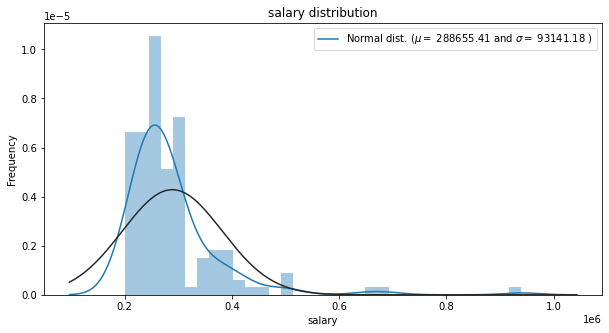

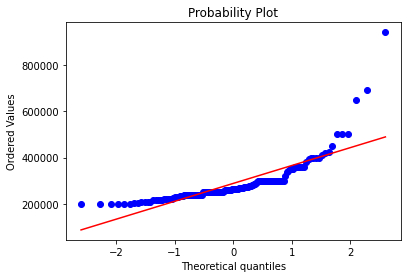

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(full_data['salary'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(no_missing_salary_df['salary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('salary distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(no_missing_salary_df['salary'], plot=plt)
plt.show()

In [21]:
salary=full_data['salary']
fig = go.Figure(go.Box(x=salary,name="Salary")) # to get Horizonal plot change axis :  x=germany_score
fig.update_layout(title="Salary Distribution")
fig.show()

**Conclusion:**The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.The variable has few outliers with mean and standard deviation 288655.41 and 93141.18 respectively.

**Different marks distributions together**

Now we would like to plot differnt marks distributions of the students together and have some insights.

In [22]:
#plotting the distribution curves together
ssc_p=full_data['ssc_p']
hsc_p=full_data['hsc_p']
degree_p=full_data['degree_p']
etest_p=full_data['etest_p']
mba_p=full_data['mba_p']		

hist_data = [ssc_p,hsc_p,degree_p,etest_p,mba_p] 
group_labels = ["ssc_p Distribution ","hsc_p Distribution ","degree_p Distribution","etest_p Distribution ","mba_p Distribution "]
colors=['blue',"green","orange","red","black"]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False,colors=colors,bin_size=[1,1,1,1,1])
fig.show()

In [23]:
#plotting the box_plots of different marks distributions together
import plotly.graph_objects as go
ssc_p=full_data['ssc_p']
hsc_p=full_data['hsc_p']
degree_p=full_data['degree_p']
etest_p=full_data['etest_p']
mba_p=full_data['mba_p']		
fig = go.Figure()
fig.add_trace(go.Box(y=ssc_p,
                     marker_color="blue",
                     name="ssc_p"))
fig.add_trace(go.Box(y=hsc_p,
                     marker_color="green",
                     name="hsc_p"))
fig.add_trace(go.Box(y=degree_p,
                     marker_color="orange",
                     name="degree_p"))
fig.add_trace(go.Box(y=etest_p,
                     marker_color="red",
                     name="etest_p"))
fig.add_trace(go.Box(y=mba_p,
                     marker_color="black",
                     name="mba_p"))
fig.update_layout(title="Distribution of different numerical variables")
fig.show()

**Conclusion:**Secondary,higher secondary and degree percentages of the students are almost similar whereas mba percentage and etest percentage are different.etest percentage has the highest spread and mba percentage has the lowest spread and both are almost symmetrically distributed.Higher secondary percentage has few outliers in both tails.Degree percentage also has a outlier.

Next, we would like to analyse the categorical variables individually.

**information about the categorical variables**

In [24]:
full_data.describe(include=['O'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [25]:
#we are creating a function to display bar chart and pie chart of the differnt categories of a categorical variable.
def pie_bar(col):
  category=full_data[col].value_counts().to_frame().reset_index().rename(columns={'index':col,col:'count'})
  fig1 = go.Figure(go.Bar(
    x=category[col],y=category['count'],
  ))
  fig1.update_layout(title_text=' Bar chart of different categories of the variable',xaxis_title="category",yaxis_title="count")



  fig2= go.Figure([go.Pie(labels=category[col], values=category['count'])])

  fig2.update_traces(textposition='inside', textinfo='percent+label')

  fig2.update_layout(title="Pie chart of different categories of the variable",title_x=0.5)
  print(category)
  fig1.update_layout(
    autosize=False,
    width=800,
    height=400,)
  fig2.update_layout(
    autosize=False,
    width=800,
    height=400,)
 
 
  fig1.show()
  fig2.show()


gender

In [26]:
#gender
pie_bar('gender')

  gender  count
0      M    139
1      F     76


Insights:Among all students 64.7 % are male .

ssc_b

In [27]:
#ssc_b
pie_bar('ssc_b')

     ssc_b  count
0  Central    116
1   Others     99


Insights:More half of the student's seconadry board was Central board.

hsc_b

In [28]:
pie_bar('hsc_b')

     hsc_b  count
0   Others    131
1  Central     84


Insights:In higher secondary, 39.1% students were from Central board and 60.9% from others.

hsc_s

In [29]:
pie_bar('hsc_s')

      hsc_s  count
0  Commerce    113
1   Science     91
2      Arts     11


Insights:In higher secondary, number of students of Arts stream is significantly low.Commerce and Science  have 52.6% and 42.3% students respectively.

degree_t

In [30]:
pie_bar('degree_t')

    degree_t  count
0  Comm&Mgmt    145
1   Sci&Tech     59
2     Others     11


Insight:In degree course major portion (67.4%) of students are from Comm&Mgmt.Sci&Tech has 27.4% students.Others stream has very low percentage of students.

workex

In [31]:
pie_bar('workex')

  workex  count
0     No    141
1    Yes     74


Insights:65.6% students have no working experience.

specialisation

In [32]:
pie_bar('specialisation')

  specialisation  count
0        Mkt&Fin    120
1         Mkt&HR     95


Insights:Among two specialisations in Mkt&Fin has more students(55.8%).

status

In [33]:
pie_bar('status')

       status  count
0      Placed    148
1  Not Placed     67


Insights:Almost 68% students got placement.

**Categorical Features VS Placement**

Now we would like to see the relationships between the categorical variables and placement.At first we shall see them in tabular form and then visually and this may help in determing the important features for the classification problem.

In [34]:
#function to check the relationship between different categorical variables and placement
def placement_ratio(col):
  
  result=full_data[[col, 'placed']].groupby([col], as_index=False).mean().sort_values(by='placed', ascending=False)
  return result


gender and placement

In [35]:
placement_ratio('gender')

,gender,placed
1,M,0.719424
0,F,0.631579


ssc_b and placement

In [36]:
placement_ratio('ssc_b')

,ssc_b,placed
1,Others,0.707071
0,Central,0.672414


hsc_b and placement

In [37]:
placement_ratio('hsc_b')

,hsc_b,placed
1,Others,0.694656
0,Central,0.678571


hsc_s and placement

In [38]:
placement_ratio('hsc_s')

,hsc_s,placed
1,Commerce,0.699115
2,Science,0.692308
0,Arts,0.545455


degree_t and placement

In [39]:
placement_ratio('degree_t')

,degree_t,placed
0,Comm&Mgmt,0.703448
2,Sci&Tech,0.694915
1,Others,0.454545


workex and placement

In [40]:
placement_ratio('workex')

,workex,placed
1,Yes,0.864865
0,No,0.595745


specialisation and placement

In [41]:
placement_ratio('specialisation')

,specialisation,placed
0,Mkt&Fin,0.791667
1,Mkt&HR,0.557895


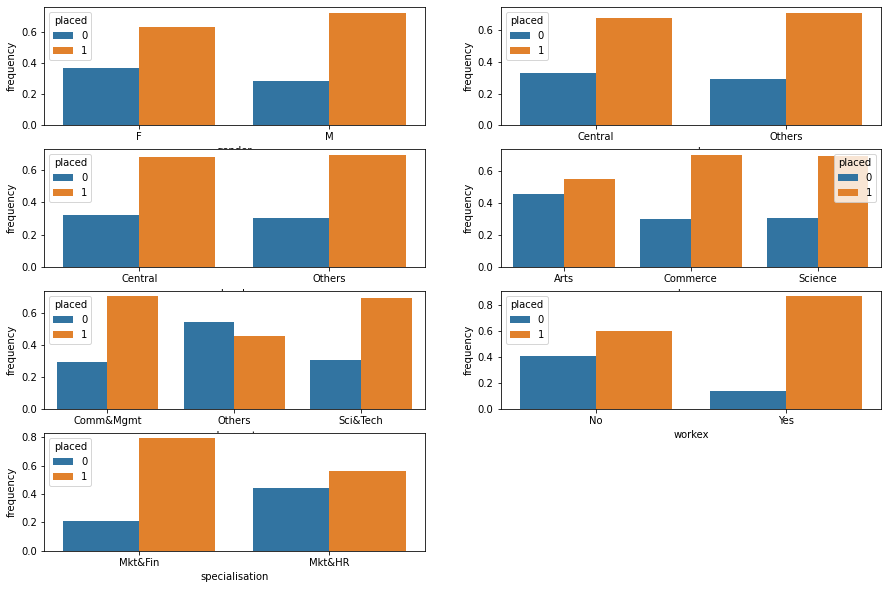

In [42]:
fig, axes = plt.subplots(4, 2,  figsize=(15, 10))

full_data['frequency'] = 0 # a dummy column to refer to
for col, ax in zip(['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t','workex','specialisation'], axes.flatten()):
    counts = full_data.groupby([col, 'placed']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(x=col, y='frequency', hue='placed', data=freq_per_group, ax=ax)
fig.delaxes(axes[3, 1])    

**Conclusion:**
1. Placement rate is little bit gender biased.Male students are more likely to be placed than the female students.So we may include gender as a predictor in placement modelling.
2. Secondary  and Higher Secondary board do not have any impact in the context of placement since,placement rates are almost same for all boards.So, we can remove ssc_b and hsc-b from modelling part(classification task).
3. In Higher Secondary stream Science and Commerce students are better than the Arts students in getting placement.So we may include hsc_s in modeeling part.
4. In degree type Comm&Mgmt and Sci&Tech have better placement rate than the others so we may keep degree_t as predictor of placement.
5. Those who had work expirience had better placement rate.So we shall include workex in predicting placement.
6. Mkt&Fin has better placement rate.So specialisation will be included in modelling.

**Numerical Features VS Placement**


Now we shall continue by checking the relationship between numerical features and placement using visualizations .



In [43]:
#function to create histograms categorized by placement 
def hist_cont_place(x):
    %matplotlib inline
    g = sns.FacetGrid(full_data, col='placed')
    g.map(plt.hist, x, bins=20)

In [44]:
#function to create box_plots categorized by placement
def boxplot_cont_place(x):
    got_placement=full_data[full_data['placed']==1][x]
    noplacement=full_data[full_data['placed']==0][x]
    fig = go.Figure()
    fig.add_trace(go.Box(y=got_placement,
                     marker_color="blue",
                     name="placed"))
    fig.add_trace(go.Box(y=noplacement,
                     marker_color="red",
                     name="not placed"))
    fig.update_layout(
    autosize=False,
    width=800,
    height=400,)
    fig.update_layout(title="Distribution of percentage according placement")
    fig.show()

ssc_p and placement

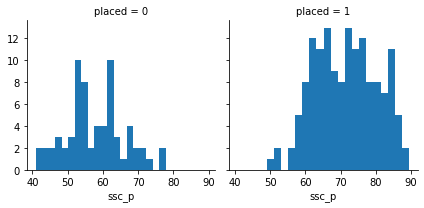

In [45]:
hist_cont_place('ssc_p')

In [46]:
boxplot_cont_place('ssc_p')

hsc_p and placement

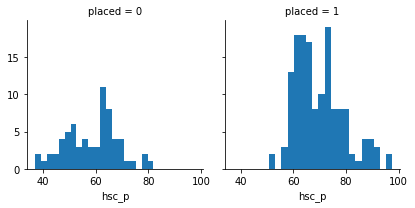

In [47]:
hist_cont_place('hsc_p')

In [48]:
boxplot_cont_place('hsc_p')

degree_p and placement

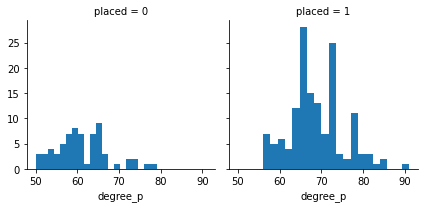

In [49]:
hist_cont_place('degree_p')

In [50]:
boxplot_cont_place('degree_p')

etest_p and placement

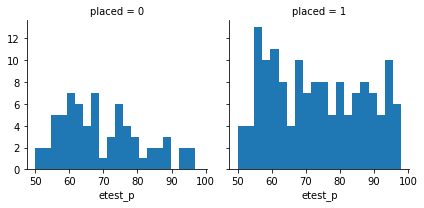

In [51]:
hist_cont_place('etest_p')

In [52]:
boxplot_cont_place('etest_p')

mba_p and placement

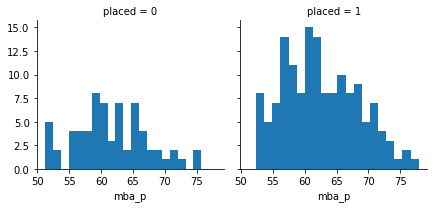

In [53]:
hist_cont_place('mba_p')

In [54]:
boxplot_cont_place('mba_p')

**Conclusion:** For ssc_p,hsc_p,degree_p ,those students who got placement have relatively higher percentages than who did not.So we may include them in our modeling.The feature etest_p has a little influence in the context of placement.We may include this feature too in classification modelling.But mba_p has no effect since mba_p distribution is almost same for placed and not placed students. So,we shall remove it for classification.

Now we shall check the relationship between salary and different variables by visualizations.At first, we shall start with categorical variables.


**Categorical Features VS Salary**

In [55]:
#function to plot category wise salary histograms of different categorical features.
def catcol_vs_salary(col):
  g= sns.FacetGrid(full_data, col =col, size = 3, aspect = 2)
  g.map(plt.hist, 'salary', color = 'r'), plt.show()
  plt.show()  

In [56]:
#function to plot category wise salary swarmplots of different categorical features.
def swramplot_cat_salary(col):
  sns.set(style="whitegrid")
  ax = sns.swarmplot(x=col, y="salary", data=full_data)

gender and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



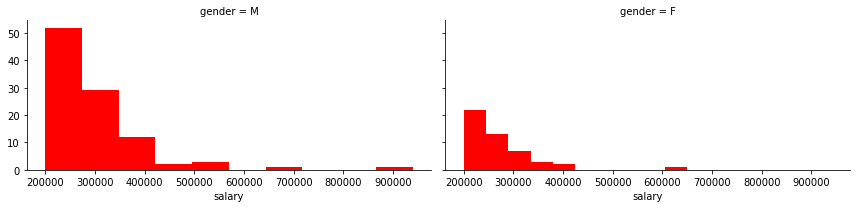

In [57]:
catcol_vs_salary('gender')

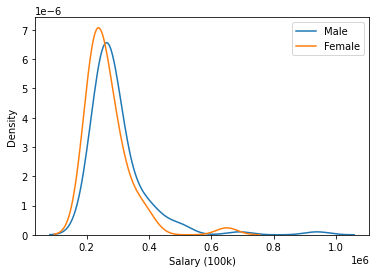

In [58]:
sns.kdeplot(full_data.salary[ full_data.gender=="M"])
sns.kdeplot(full_data.salary[ full_data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

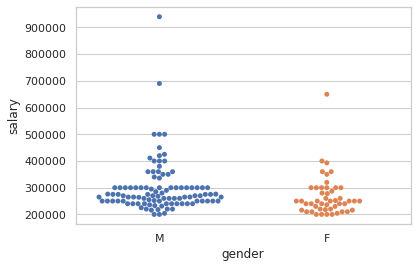

In [59]:
swramplot_cat_salary('gender')

Insights:Male students have better salaries.In salary prediction we may keep the gender features.

ssc_b and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



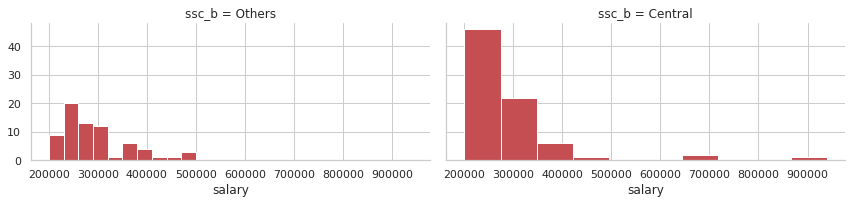

In [60]:
catcol_vs_salary('ssc_b')

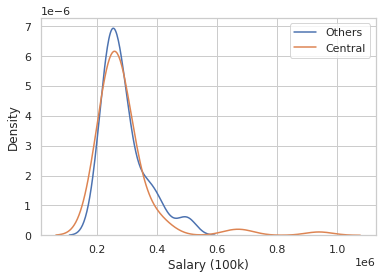

In [61]:
sns.kdeplot(full_data.salary[ full_data.ssc_b=="Others"])
sns.kdeplot(full_data.salary[ full_data.ssc_b=="Central"])
plt.legend(["Others", "Central"])
plt.xlabel("Salary (100k)")
plt.show()

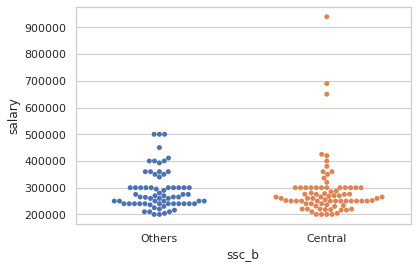

In [62]:
swramplot_cat_salary('ssc_b')

Insights:In the context of salary different secondary boards do not differ to much.We may discard this feature in salary prediction.

hsc_b and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



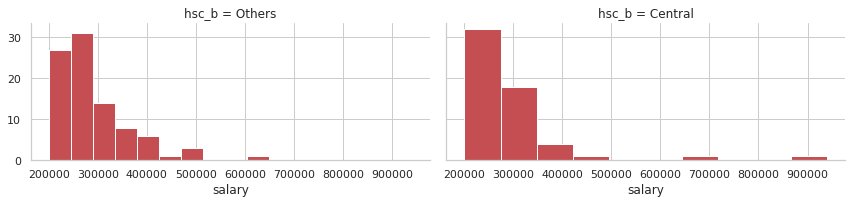

In [63]:
catcol_vs_salary('hsc_b')

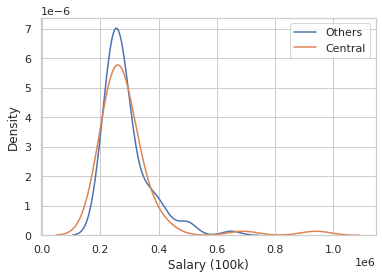

In [64]:
sns.kdeplot(full_data.salary[ full_data.hsc_b=="Others"])
sns.kdeplot(full_data.salary[ full_data.hsc_b=="Central"])
plt.legend(["Others", "Central"])
plt.xlabel("Salary (100k)")
plt.show()

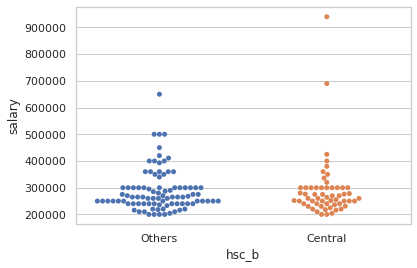

In [65]:
swramplot_cat_salary('hsc_b')

Insights:Students of Others board has a little bit better salary than the students from Central board.We may not include this feature in modelling part of salary prediction. 

hsc_s and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



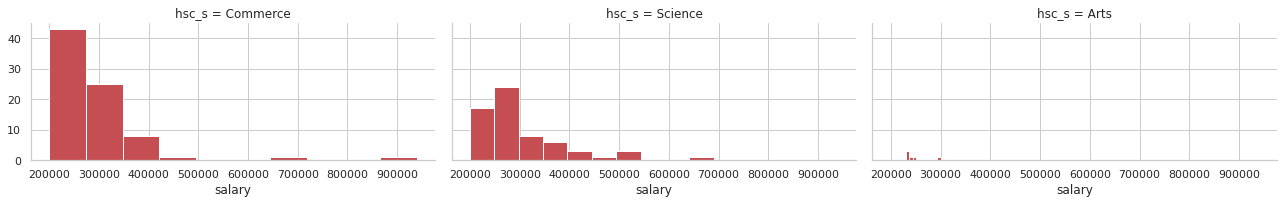

In [66]:
catcol_vs_salary('hsc_s')

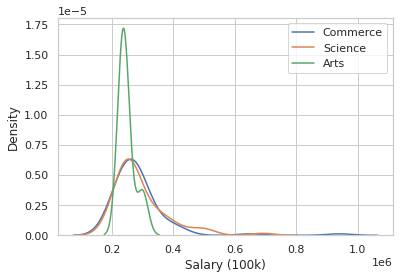

In [67]:
sns.kdeplot(full_data.salary[ full_data.hsc_s=="Commerce"])
sns.kdeplot(full_data.salary[ full_data.hsc_s=="Science"])
sns.kdeplot(full_data.salary[ full_data.hsc_s=="Arts"])
plt.legend(["Commerce", "Science","Arts"])
plt.xlabel("Salary (100k)")
plt.show()

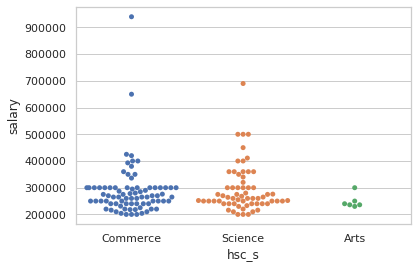

In [68]:
swramplot_cat_salary('hsc_s')

Insights:As higher secondary stream Commerce and Science students have better salaries than the Arts students.For such difference, may include this feature in salary prediction.

degree_t and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



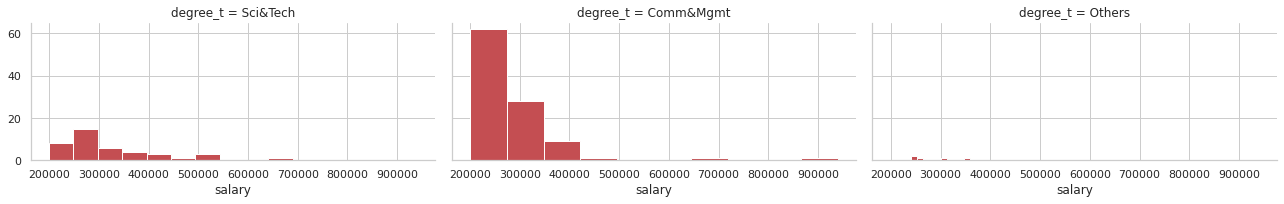

In [69]:
catcol_vs_salary('degree_t')

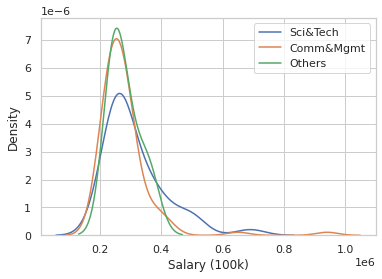

In [70]:
sns.kdeplot(full_data.salary[ full_data.degree_t=="Sci&Tech"])
sns.kdeplot(full_data.salary[ full_data.degree_t=="Comm&Mgmt"])
sns.kdeplot(full_data.salary[ full_data.degree_t=="Others"])
plt.legend(["Sci&Tech", "Comm&Mgmt","Others"])
plt.xlabel("Salary (100k)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



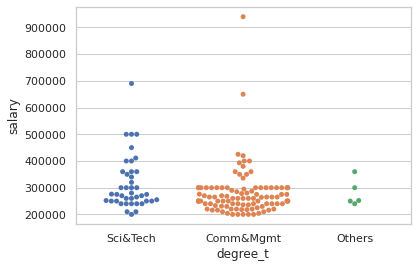

In [71]:
swramplot_cat_salary('degree_t')

Insights:As degree type Comm&Mgmt students have higher salaries.In salary prediction we shall keep the variable degree_t.

workex and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



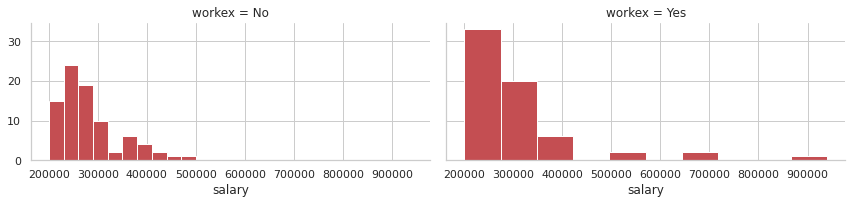

In [72]:
catcol_vs_salary('workex')

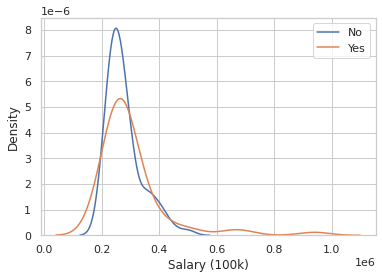

In [73]:
sns.kdeplot(full_data.salary[ full_data.workex=="No"])
sns.kdeplot(full_data.salary[ full_data.workex=="Yes"])
plt.legend(["No", "Yes"])
plt.xlabel("Salary (100k)")
plt.show()

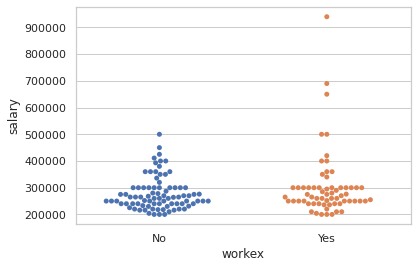

In [74]:
swramplot_cat_salary('workex')

Insights: Students with work experience have better salary than who have not.So, we would like to include this feature in salary prediction.

specialisation and salary

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



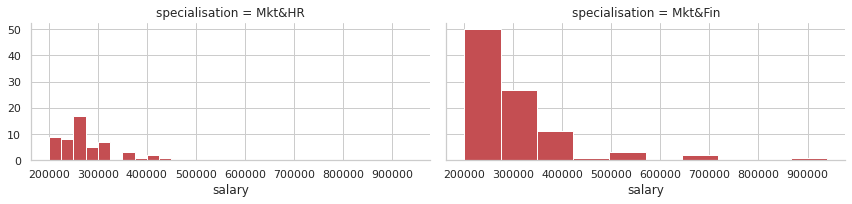

In [75]:
catcol_vs_salary('specialisation')

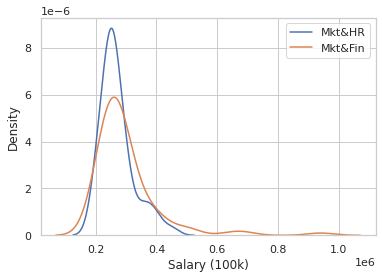

In [76]:
sns.kdeplot(full_data.salary[ full_data.specialisation=="Mkt&HR"])
sns.kdeplot(full_data.salary[ full_data.specialisation=="Mkt&Fin"])
plt.legend(["Mkt&HR", "Mkt&Fin"])
plt.xlabel("Salary (100k)")
plt.show()

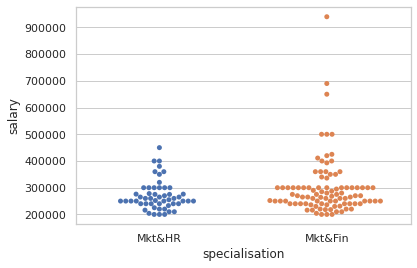

In [77]:
swramplot_cat_salary('specialisation')

Insights:Mkt&Fin has higher salaries than Mkt&HR.We may keep the specialisation variable to predict salary.

**Numerical Features VS Salary**

Now we shall see the relationship between salary and the continuous features through visualization.

In [78]:
# creating a function plot the hiscontour of continuous variables vs salary
def histcontour(x):
    x = full_data[x]
    y = full_data['salary']

    import plotly.graph_objects as go
    fig = go.Figure()
    fig.add_trace(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = 'gray',
        reversescale = True,
        xaxis = 'x',
        yaxis = 'y'
        ))
    fig.add_trace(go.Scatter(
        x = x,
        y = y,
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = "red", #'rgba(0,0,0,0.3)',
            size = 3
        )
    ))
    fig.add_trace(go.Histogram(
        y = y,
        xaxis = 'x2',
        marker = dict(
            color = "blue", #'rgba(0,0,0,1)'
        )
    ))
    fig.add_trace(go.Histogram(
        x = x,
        yaxis = 'y2',
        marker = dict(
            color = "blue",# 'rgba(0,0,0,1)'
        )
    ))

    fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
       domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
       domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
       domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False,
    title_text="Density Contour of the variable with salary",title_x=0.5
    )
    fig.show()

In [79]:
# creating a function to plot the lineplot of continuous variables vs salary
def lineplot_numeric_vs_salary(col):
    sns.lineplot(col, "salary", data=full_data)
    plt.figure(figsize=(5,4))
    plt.show()

ssc_p and salary

In [80]:
histcontour('ssc_p')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



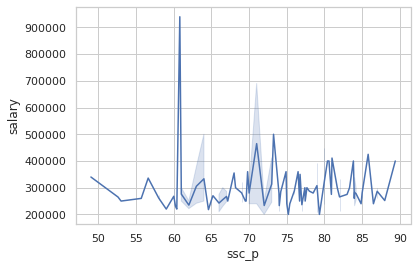

<Figure size 360x288 with 0 Axes>

In [81]:
lineplot_numeric_vs_salary('ssc_p')

hsc_p and salary

In [82]:
histcontour('hsc_p')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



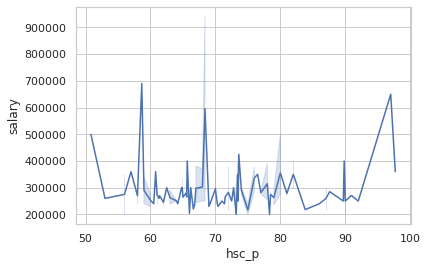

<Figure size 360x288 with 0 Axes>

In [83]:
lineplot_numeric_vs_salary('hsc_p')

degree_p and salary

In [84]:
histcontour('degree_p')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



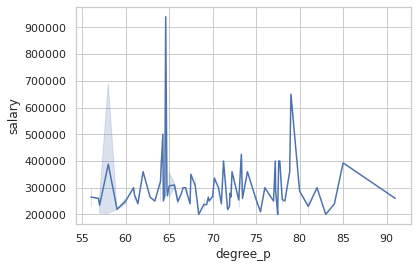

<Figure size 360x288 with 0 Axes>

In [85]:
lineplot_numeric_vs_salary('degree_p')

mba_p and salary

In [86]:
histcontour('mba_p')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



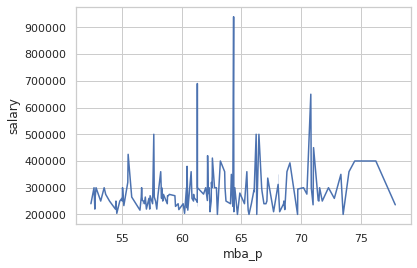

<Figure size 360x288 with 0 Axes>

In [87]:
lineplot_numeric_vs_salary('mba_p')

etest_p and salary

In [88]:
histcontour('etest_p')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



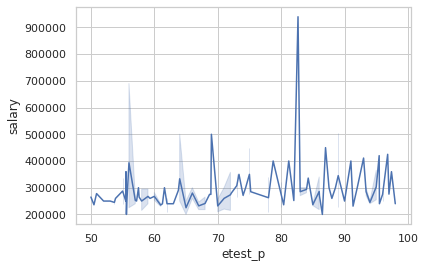

<Figure size 360x288 with 0 Axes>

In [89]:
lineplot_numeric_vs_salary('etest_p')

**Conclusion :**It seems there is moderate relationship between different marks percentages and salary.

# Data pre processing

Now for modelling purpose we do not need status, frequency and sl_no any more .So we shall remove them.

In [90]:
full_data=full_data.drop(['status','frequency','sl_no'], axis = 1)

**Correlation**

We would like to see the pearson's correlation coefficients between the numerical features.In statistics, the Pearson correlation coefficient, also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC), or the bivariate correlation, is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.Actually we shall see the linear relationships between the numerical features and the salary.So,we shall drop the column placed and then create a correlation heatmap.

**Correlation Heatmap**

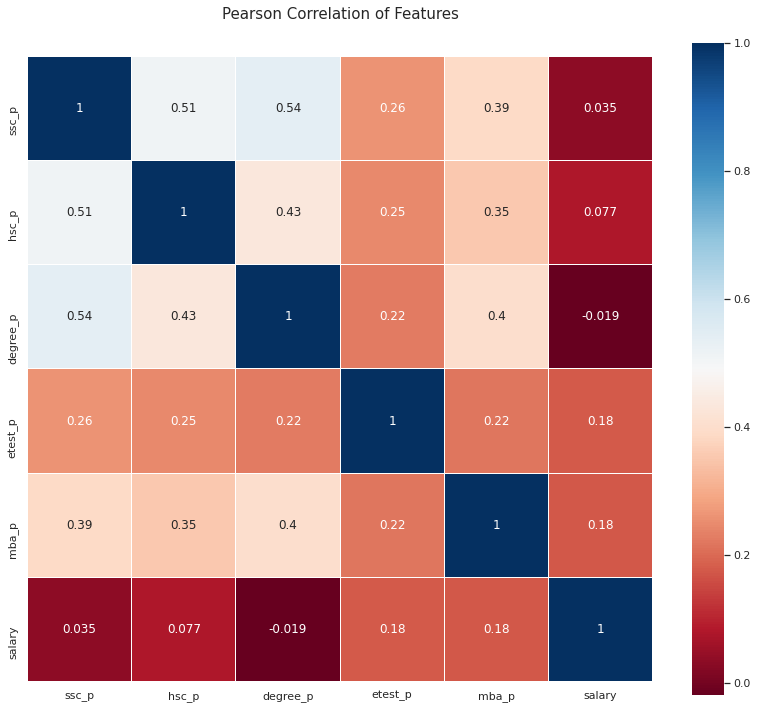

In [91]:
numeric_full_data= full_data.select_dtypes(['number'])
numeric_full_data= numeric_full_data.drop(['placed'],axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(numeric_full_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Conclusion:** etest_p and mba_p has a very little correlation with salary.Different marks percentages are moderately correlated among themselves.

Converting the categorical variables into numerical variables so that we can use these categorical variables in the model.

In [92]:
#converting the categorical variables into numerical variables 
full_data['gender'] = full_data['gender'].map( {'F': 0, 'M': 1} ).astype(int)
full_data['ssc_b'] = full_data['ssc_b'].map( {'Others': 0, 'Central': 1} ).astype(int)
full_data['hsc_b'] = full_data['hsc_b'].map( {'Others': 0, 'Central': 1} ).astype(int)
full_data['hsc_s'] = full_data['hsc_s'].map( {'Commerce': 0, 'Science': 1,'Arts':2} ).astype(int)
full_data['degree_t'] = full_data['degree_t'].map( {'Sci&Tech': 0, 'Comm&Mgmt': 1,'Others':2} ).astype(int)
full_data['workex'] = full_data['workex'].map( {'No': 0, 'Yes': 1} ).astype(int)
full_data['specialisation'] = full_data['specialisation'].map( {'Mkt&HR': 0, 'Mkt&Fin': 1} ).astype(int)

Check whether all values have turned into numerical or not

In [93]:
full_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,placed
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,270000.0,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,200000.0,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,250000.0,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,NaN,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,425000.0,1


**Outliers :**When modeling, it is important to clean the data sample to ensure that the observations best represent the problem.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

Deleting outliers  :  from different box plot graphs we can detect the outliers manually and remove them.

In [94]:
full_data = full_data.drop(full_data[(full_data['salary']>390000)].index)
no_missing_salary_df =no_missing_salary_df.drop(no_missing_salary_df[(no_missing_salary_df['salary']>390000)].index)
full_data = full_data.drop(full_data[(full_data['hsc_p']<45.83)].index)
full_data = full_data.drop(full_data[(full_data['hsc_p']>87.6)].index)
full_data = full_data.drop(full_data[(full_data['degree_p']>84)].index)
full_data = full_data.drop(full_data[(full_data['mba_p']>75.71)].index)


**Skewness of Numerical Features**

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

In [95]:
skewValue = numeric_full_data.skew(axis=0)
print(skewValue)

ssc_p      -0.132649
hsc_p       0.163639
degree_p    0.244917
etest_p     0.282308
mba_p       0.313576
salary      3.569747
dtype: float64



Removing skewness from data will improve the modelling quality.The above chart shows that only the regression target variable salary  is highly positively skewed(we also saw this from the normal curve and Q-Q plot) .So,we have to transfrom it towards normal curve. We shall use the numpy fuction log1p which  applies log(1+x) to all elements of the column salary.

In [96]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
full_data["salary"] = np.log1p(full_data["salary"])

**Check the new salary distribution**


 mu = 12.48 and sigma = 0.15



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



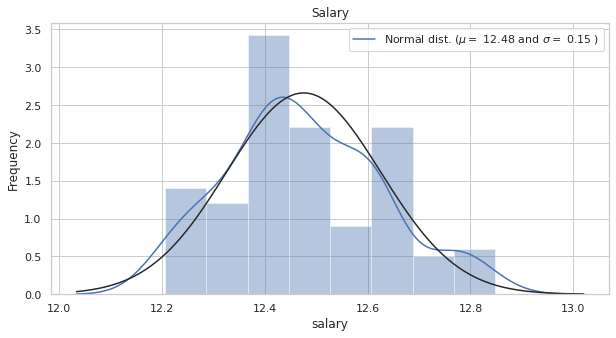

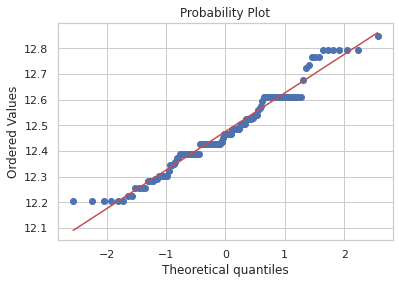

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(full_data['salary'] , fit=norm);
no_missing_salary_df["salary"] = np.log1p(no_missing_salary_df["salary"])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(no_missing_salary_df['salary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Salary')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(no_missing_salary_df['salary'], plot=plt)
plt.show()

We would like to get the data frame where student's whose salaries are more than zeros i.e who got placement.This data frame will be used in salary prediction.Because it will be meaningless to predict the salary of the students who have not got placement.

In [98]:
salary_full_data=full_data[full_data['placed']==1]

In [99]:
salary_full_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,placed
1,1,79.33,1,78.33,0,1,77.48,0,1,86.50,1,66.28,12.206078,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.00,1,57.80,12.429220,1
7,1,82.00,1,64.00,1,1,66.00,0,1,67.00,1,62.14,12.437188,1
8,1,73.00,1,79.00,1,0,72.00,1,0,91.34,1,61.29,12.350177,1
10,1,58.00,1,61.00,1,0,60.00,1,1,62.00,0,60.85,12.468441,1


# Modelling

We are perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset.

# Classification Task

There are many classification algorithms and we shall implement important few of them.We shall use

> 

1.   KNN or k-Nearest Neighbors
2.   Support Vector Machines
4.   Naive Bayes classifier
5.   Decision Tree
6.   Random Forrest
7.   Perceptron
7.   Logistic Regression

Finally we shall calculate their efficiency.





**Important Features for Classification**

At first we shall apply sklearn's SelectKBest class to extract top features for the specific task

In [100]:
X = full_data.iloc[:,0:12]  #independent columns
y = full_data.iloc[:,-1]    #target column i.e placed
#apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

          features      Score
1            ssc_p  98.945961
3            hsc_p  43.135093
6         degree_p  28.752923
8           workex   8.335325
10  specialisation   5.177317
9          etest_p   2.892128
0           gender   0.704102
11           mba_p   0.155412
4            hsc_b   0.113403
5            hsc_s   0.048657
2            ssc_b   0.046940
7         degree_t   0.019566


Seperating Features and Target:We shall remove the less important features according to the above table and set the predictors and classification target variable.

In [101]:
X = full_data[[ 'ssc_p', 'hsc_p',  'degree_p',  'workex','etest_p', 'specialisation']]
y = full_data['placed']

 Feature Scaling :

*   Percentages are on scale 0-100
*   Categorical Features are on range 0-1 (By one hot encoding)

*   High Scale for Salary -> Salary is heavily skewed too -> SkLearn has RobustScaler which might work well here

Scaling Everything between 0 and 1 (This wont affect encoded values)






In [102]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Splitting the whole data set into two parts train and test so that we can validate our model

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=1)

At first we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [104]:
# Support Vector Machines
svc = SVC(probability=True)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc=100*accuracy_score(y_test, Y_pred)
acc_svc

78.57142857142857

In [105]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        20
           1       0.75      1.00      0.86        36

    accuracy                           0.79        56
   macro avg       0.88      0.70      0.71        56
weighted avg       0.84      0.79      0.76        56



In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [106]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn=100*accuracy_score(y_test, Y_pred)
acc_knn

73.21428571428571

In [107]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.74      0.89      0.81        36

    accuracy                           0.73        56
   macro avg       0.72      0.67      0.68        56
weighted avg       0.73      0.73      0.72        56



In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [108]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian =100*accuracy_score(y_test, Y_pred)
acc_gaussian

85.71428571428571

In [109]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.89      0.89      0.89        36

    accuracy                           0.86        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.86      0.86      0.86        56



The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [110]:
#perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron =100*accuracy_score(y_test, Y_pred)
acc_perceptron

64.28571428571429

In [111]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        20
           1       0.75      0.67      0.71        36

    accuracy                           0.64        56
   macro avg       0.62      0.63      0.63        56
weighted avg       0.66      0.64      0.65        56



This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [112]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree=100*accuracy_score(y_test, Y_pred)
acc_decision_tree

75.0

In [113]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.45      0.56        20
           1       0.75      0.92      0.83        36

    accuracy                           0.75        56
   macro avg       0.75      0.68      0.69        56
weighted avg       0.75      0.75      0.73        56



Stochastic Gradient Descent

In [114]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = 100*accuracy_score(y_test, Y_pred)
acc_sgd

83.92857142857143

In [115]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.97      0.78      0.86        36

    accuracy                           0.84        56
   macro avg       0.83      0.86      0.84        56
weighted avg       0.87      0.84      0.84        56



The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [116]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest=100*accuracy_score(y_test, Y_pred)
acc_random_forest

80.35714285714286

In [117]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65        20
           1       0.78      0.97      0.86        36

    accuracy                           0.80        56
   macro avg       0.84      0.74      0.75        56
weighted avg       0.82      0.80      0.79        56



Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [118]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log=100*accuracy_score(y_test, Y_pred)
acc_log

78.57142857142857

In [119]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        20
           1       0.75      1.00      0.86        36

    accuracy                           0.79        56
   macro avg       0.88      0.70      0.71        56
weighted avg       0.84      0.79      0.76        56



Comparing the models according to the acuracy .

In [120]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Percetron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,acc_perceptron, 
              acc_sgd,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Naive Bayes,85.714286
6,Stochastic Gradient Decent,83.928571
3,Random Forest,80.357143
0,Support Vector Machines,78.571429
2,Logistic Regression,78.571429
7,Decision Tree,75.000000
1,KNN,73.214286
5,Percetron,64.285714


We can see that naive bayes and random forest are the top most model according to accuracy measure.

We shall use the area under the receiver operating characteristic (ROC) curve (AUC) as a performance measure for machine learning algorithms and plot them(perceptron and sgd classifiers have been removed due to attribute error of sklearn library).

In [121]:
# Instantiate the classfiers and make a list
classifiers = [svc, 
               knn,
               logreg, 
               random_forest, 
               gaussian,
               decision_tree]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

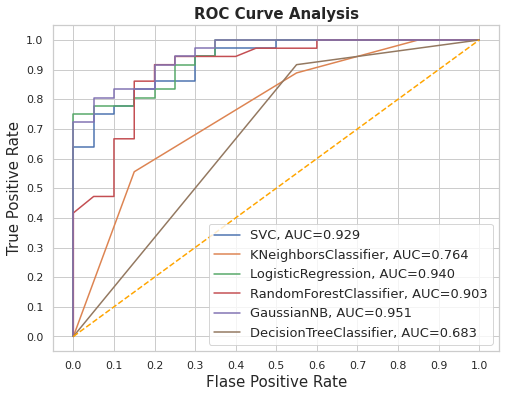

In [122]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

From the above graph and AUC score ,we can conclude that GaussianNB,LogisticRegression and Support Vector Machine are performing very well as a classification model.

We may use LogisticRegression to check our classification task for some of  the test data.

In [123]:
Predictions = pd.DataFrame({
        "True Value": y_test,
        "Predicted Value": Y_pred
    })
Predictions.head(10)

,True Value,Predicted Value
18,0,1
208,0,0
76,1,1
48,1,1
193,1,1
182,0,1
113,1,1
205,1,1
43,1,1
64,1,1


Here ,as a classification model we have chosen LogisticRegression and would like to see the most important features to determine placement.

[0.33156254 0.22988048 0.24006896 0.04953137 0.10950146 0.03945519]


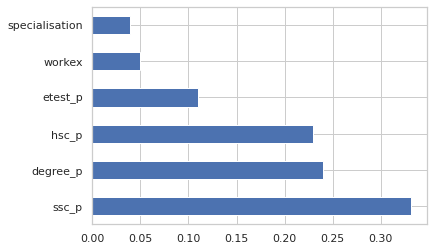

In [124]:
model = random_forest
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Conclusion:**ssc_p,hsc_p and degree_p have the most influences in the context of placement.The features etest_p,specialisation and workex have also contributions on placement.

# Regression Task


As we mentioned earlier,for regression task we shall use the data frame salary_ full_data.For our regression task we shall use the XGboost regressor which is an implementation of gradient boosting algorithm.XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.

Our dataframe 

In [125]:
salary_full_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,placed
1,1,79.33,1,78.33,0,1,77.48,0,1,86.50,1,66.28,12.206078,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.00,1,57.80,12.429220,1
7,1,82.00,1,64.00,1,1,66.00,0,1,67.00,1,62.14,12.437188,1
8,1,73.00,1,79.00,1,0,72.00,1,0,91.34,1,61.29,12.350177,1
10,1,58.00,1,61.00,1,0,60.00,1,1,62.00,0,60.85,12.468441,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,83.33,1,78.00,0,0,61.00,1,1,88.56,1,71.55,12.611541,1
209,1,62.00,1,72.00,1,0,65.00,1,0,67.00,1,56.49,12.283038,1
211,1,58.00,0,60.00,0,1,72.00,0,0,74.00,1,53.62,12.524530,1
212,1,67.00,0,67.00,0,0,73.00,1,1,59.00,1,69.72,12.594734,1


**Feature Impotance**

We shall install the package BorutaShap to know the important features.

In [126]:
!pip install BorutaShap

     |████████████████████████████████| 358kB 6.7MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489409 sha256=95c3e3e24399660b420828c4d3ab028fb482673aa46265008ca9b503c35d92d3
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [127]:
from BorutaShap import BorutaShap

# no model selected default is Random Forest, if classification is True it is a Classification problem
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)

Feature_Selector.fit(X=salary_full_data.iloc[:,0:12], y=salary_full_data.iloc[:,-2], n_trials=100, random_state=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

100%|██████████| 100/100 [00:26<00:00,  3.75it/s]

3 attributes confirmed important: ['degree_p', 'etest_p', 'mba_p']
9 attributes confirmed unimportant: ['gender', 'degree_t', 'hsc_b', 'specialisation', 'ssc_b', 'hsc_p', 'ssc_p', 'hsc_s', 'workex']
0 tentative attributes remains: []


So,according to BorutaShap,etest_p, degree_p and mba_p are the most impotant features to determine salary.

We shall again check which features are important for this regression task by F-test and Mutual Information.F-test captures only linear dependency.On the other hand, mutual information can capture any kind of dependency between variables .

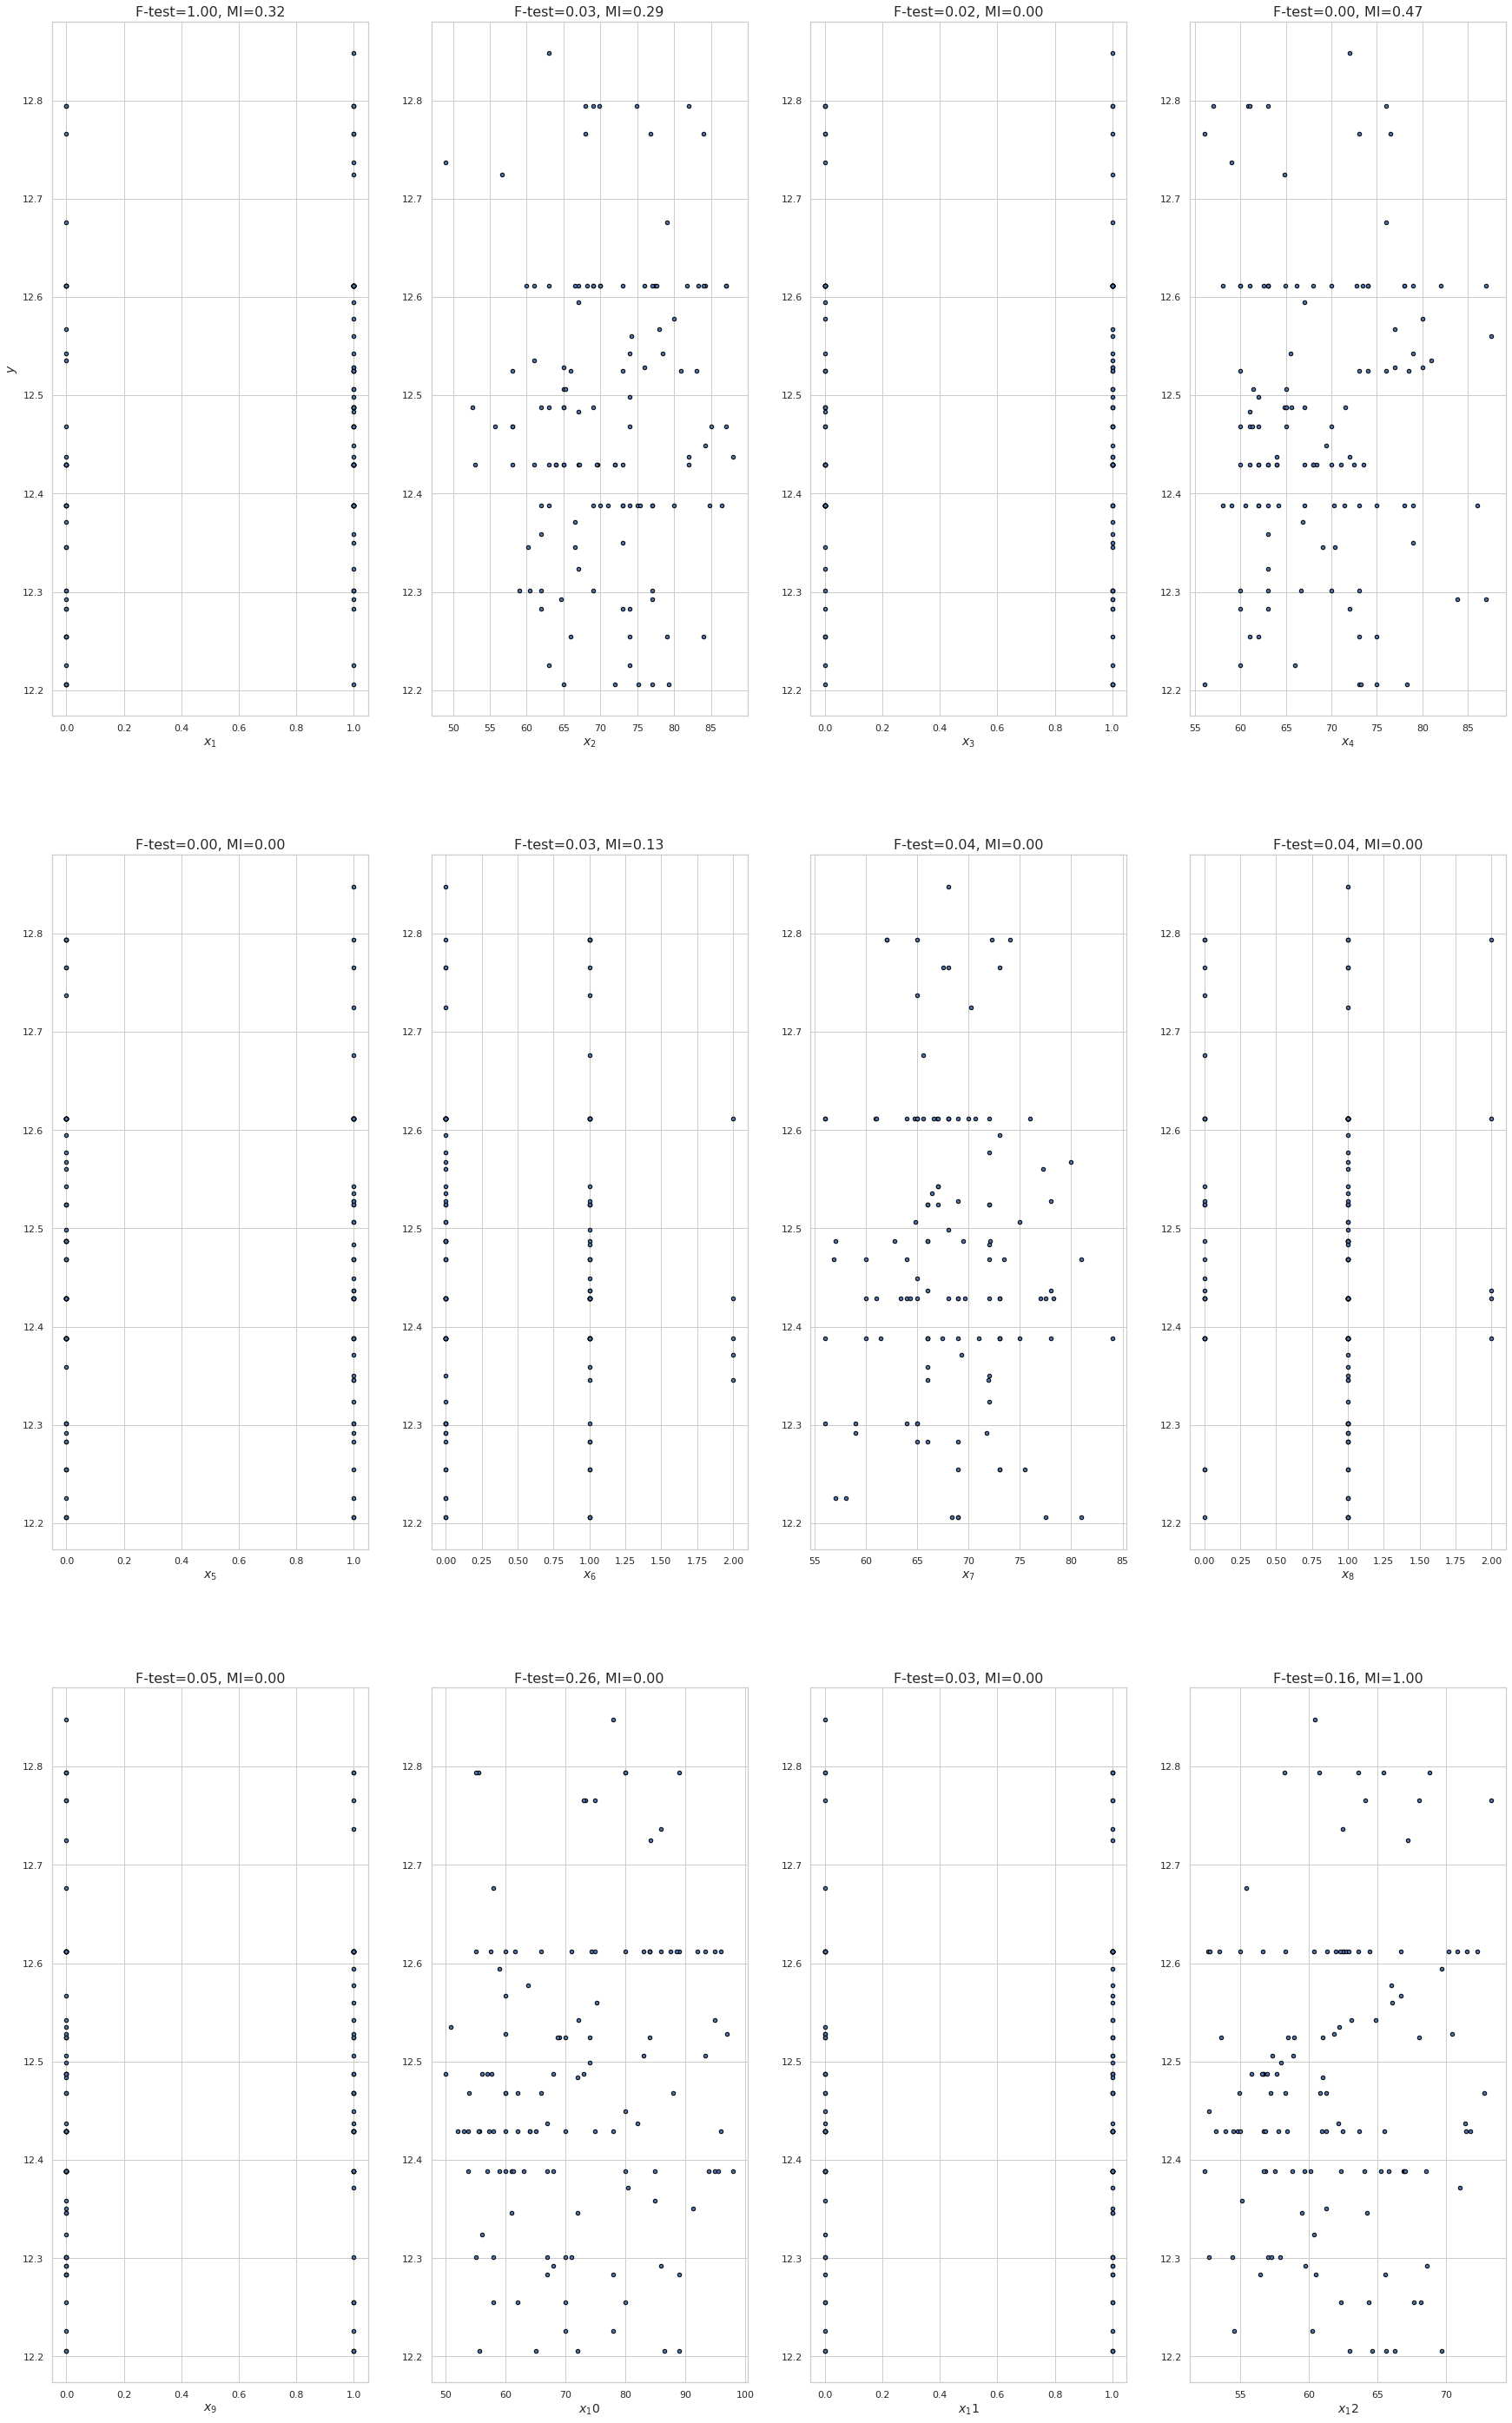

In [128]:
np.random.seed(0)
X = salary_full_data.iloc[:,0:12].values
y = salary_full_data.iloc[:,-2].values

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(30, 50))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

According to the F-test and MI score important features for predicting salary are ssc_p,hsc_p,hsc_s,etest_p and mba_p.

Setting predicor and target variables

In [129]:
X = salary_full_data[[ 'ssc_p', 'hsc_p',  'degree_p',  'workex','etest_p', 'specialisation','gender','mba_p','degree_t']]
y = salary_full_data['salary']

Scaling

In [130]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Partitioning the dataset into two parts train and test

In [131]:
train_X, test_X, train_y,test_y = train_test_split(X_scaled, y, test_size=0.3,random_state=1)

XGboost

In [132]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, verbose=False)

[04:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Prediction and MAE :Now we shall predict the salry with our model and as an evaluation matric we shall use mean absolute error.In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.It is thus an arithmetic average of the absolute errors.














In [133]:
predictions = np.expm1(my_model.predict(test_X))
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, np.expm1(test_y))))

Mean Absolute Error : 32481.819490131584


So all academic marks ,gender and work experience have impact on salary.

XGBoost has in built feature importance .We would like to plot them.

[04:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


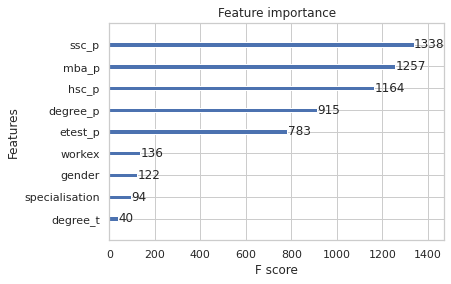

In [134]:
my_model.fit(X, y)
plot_importance(my_model)
plt.show()

**Conclusion :**All the acdemic marks have high impact on salary. Workex gender and specialisation and are also significant to determine salary.

**Thank you for reading this notebook**

#                              END